# **M1-MEEF Mathématiques** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Notebook : Correction TP : Somme des variances**




**O.Thöni - UCO-IFUCOME, groupes "Mathématiques" et "Numérique et Sciences Informatiques"**

<img src="http://blog.legardemots.fr/public/icosaedre.jpg" width="160" height="150" align = "center"/>

<img src="https://www.baccarat.fr/dw/image/v2/BBLJ_PRD/on/demandware.static/-/Sites-baccarat-master-products/default/dwa5b31eef/original/Jeux/2813749.jpg?sw=1700&sh=1700&sm=fit" width="300" height="300" align = "center"/>




## **Simulation d'un loi binomiale**

Ceci requiert l'import du module *random*, et accessoirement de *MatPlotLib.Pyplot* pour les graphiques.


In [ ]:
import random as rd

Commençons par simuler un tirage de Bernoulli, de probabilité p



In [ ]:
def bernoulli(p):
    u = rd.random()
    b = (u < p)
    print(u)
    return b

In [ ]:
p = 0.4
bernoulli(p)

0.7657081613128945


False

In [ ]:
def bernoulli(p):
    return int(rd.random()<p)

In [ ]:
bernoulli(p)

0

Effectuons maintenant n tirages indépendants selon cette loi de Bernoulli de paramètre p, c'est-à-dire un tirage binomial selon la loi $B \left ( n ; p \right )$

In [ ]:
def binomiale(n,p):
    '''Cette fonction simule un tirage aléatoire selon la loi binomiale de paramètres n et p donnés en entrées'''
    B = []
    for k in range(n):
        B.append(bernoulli(p))
    return B,sum(B)

In [ ]:
(n_tirages_bernoulli, nb_succes) = binomiale(10,0.4)
print(n_tirages_bernoulli)
print(nb_succes)

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
3


simplifions :

In [ ]:
def binomiale(n,p):
    '''Cette fonction simule un tirage aléatoire selon la loi binomiale de paramètres n et p donnés en entrées'''
    B = []
    for k in range(n):
        B.append(bernoulli(p))
    return sum(B)


In [ ]:
binomiale(10,0.4)

3

## **L'exercice : observer la propriété de somme des variances**

Voici l'expérience :

On dispose d'un dé cubique que l'on lance $n_1$ fois et d'un dé icosaédrique que l'on lance $n_2$ fois. On compte le nombre de "1" obtenus par chaque dé, $X_1$ et $X_2$ , et le nombre de "1" obtenus en tout.

Simuler cette expérience à l'aide de la programmation en Python (décomposer la tâche en tâche moins complexes, en utilisant des fonctions !), illustrer graphiquement, et calculer les éléments caractéristiques (moyenne et variance) de chaque série statistique, et de la série somme.

**1<sup>er</sup> dé, cubique :**
On lance n1 fois le dé cubique et on compte le nombre de "1".

In [ ]:
def tirage_de1(N):
    '''On lance N fois le dé n°1, probabilité de succès 1/6, et on compte le nombre de succès'''
    return binomiale(N,1/6)

In [ ]:
X1 = tirage_de1(50)
X1

9

**2<sup>ème</sup> dé, icosaédrique :**

On lance n2 fois le dé icosaédrique et on compte le nombre de "1".

In [ ]:
def tirage_de2(N):
    '''On lance N fois le dé n°2, probabilité de succès 1/20, et on compte le nombre de succès'''
    return binomiale(N,1/20)

In [ ]:
X2 = tirage_de2(50)
X2

2

**Somme des deux variables**

Une simulation de somme :

In [ ]:
n1 = 20     # on va tirer n1 fois le dé 1
n2 = 100    # on va tirer n2 fois le dé 2
X1 = tirage_de1(n1) # on compte le nombre de "1" dans n1 tirages du dé 1
X2 = tirage_de2(n2) # on compte le nombre de "1" dans n2 tirages du dé 2

S = X1+X2   # on totalise le nombre de "1" du dé 1 et le nombre de "1" du dé 2
print(X1)
print(X2)
print(S)

1
7
8


Échantillon de N sommes :

In [ ]:
def echantillon_somme(N):
    '''Cette fonction simule N tirages aléatoires de la somme des deux variables'''
    echt = []
    for k in range(N):
        X1 = tirage_de1(n1) # on compte le nombre de "1" dans n1 tirages du dé 1
        X2 = tirage_de2(n2) # on compte le nombre de "1" dans n2 tirages du dé 2
        S = X1+X2
        echt = echt + [S]   #liste des résultats
    return echt

In [ ]:
N = 20
echantillon_somme(N)

[7, 8, 15, 9, 6, 6, 13, 5, 4, 10, 13, 9, 9, 8, 3, 7, 3, 9, 14, 7]

**Calcul des éléments statistiques et comparaison avec les valeurs théoriques**

* **échantillon de N expériences de sommes de X1 et X2**

In [ ]:
N = 2000


print('Échantillon de',N, 'tirages de la somme des deux variables :')

echantillon = [0]*N


echantillon[:] = echantillon_somme(N)


print(echantillon)


Échantillon de 2000 tirages de la somme des deux variables :
[7, 9, 8, 10, 7, 9, 8, 4, 8, 7, 8, 7, 9, 6, 9, 11, 10, 5, 8, 8, 16, 3, 4, 9, 6, 11, 6, 6, 9, 7, 9, 7, 9, 11, 5, 11, 11, 8, 15, 11, 11, 10, 11, 2, 11, 7, 14, 6, 7, 7, 10, 4, 13, 8, 8, 7, 11, 7, 12, 9, 11, 12, 7, 6, 5, 10, 8, 9, 8, 2, 13, 12, 10, 10, 7, 9, 13, 8, 6, 5, 9, 16, 10, 8, 8, 8, 5, 9, 6, 7, 6, 8, 6, 10, 6, 7, 9, 10, 6, 10, 13, 5, 9, 6, 7, 8, 3, 10, 11, 7, 8, 10, 9, 10, 14, 11, 6, 6, 3, 9, 16, 9, 13, 9, 7, 8, 9, 10, 7, 6, 11, 9, 8, 1, 8, 10, 4, 4, 13, 7, 3, 8, 7, 10, 12, 8, 11, 8, 4, 13, 9, 13, 7, 13, 7, 10, 12, 9, 10, 9, 8, 4, 13, 5, 11, 5, 11, 15, 8, 12, 8, 8, 11, 12, 11, 9, 2, 3, 6, 9, 10, 11, 6, 8, 9, 10, 10, 9, 13, 11, 11, 5, 7, 6, 5, 11, 5, 6, 12, 5, 6, 9, 7, 9, 5, 2, 11, 14, 9, 10, 6, 6, 12, 9, 7, 15, 8, 8, 8, 9, 3, 8, 6, 3, 12, 9, 12, 8, 6, 8, 6, 3, 10, 9, 9, 14, 11, 4, 7, 4, 15, 7, 4, 10, 5, 12, 9, 9, 5, 5, 10, 11, 4, 5, 12, 6, 9, 5, 6, 13, 8, 8, 3, 9, 6, 13, 10, 7, 9, 9, 6, 11, 11, 7, 6, 12, 10, 9, 5, 13, 5, 

* **Moyenne**

In [ ]:
def moyenne(echantillon) :
    N = len(echantillon)
    S = sum(echantillon)
    return(S/N)

In [ ]:
esp_X1 = n1*1/6
esp_X2 = n2*1/20

print('      espérance théorique de X1 : nombre de "1" sur ',n1,' tirages du dé cubique :',esp_X1)
print('      espérance théorique de X2 : nombre de "1" sur ',n2,' tirages du dé icosaédrique :',esp_X2)

S = sum(echantillon)
S_bar = moyenne(echantillon)
print("Moyenne de l'échantillon :",S_bar)
print('      somme des espérances théoriques :', esp_X1 + esp_X2)

      espérance théorique de X1 : nombre de "1" sur  20  tirages du dé cubique : 3.3333333333333335
      espérance théorique de X2 : nombre de "1" sur  100  tirages du dé icosaédrique : 5.0
Moyenne de l'échantillon : 8.354
      somme des espérances théoriques : 8.333333333333334


* **Variance**

In [ ]:
def var(X):
    Xcarre = [valeur**2 for valeur in X] # calcul de la série X²
    return moyenne(Xcarre) - (moyenne(X))**2 # formule de Koenig-Huygens


In [ ]:
var_X1 = n1 *1/6 * 5/6 # npq
var_X2 = n2 *1/20 * 19/20

print('      variance théorique de X1 (nombre de "1" sur ',n1,' tirages du dé cubique) :',var_X1)
print('      variance théorique de X2 (nombre de "1" sur ',n2,' tirages du dé icosaédrique) :',var_X2)

var_S = var(echantillon)

print("      Variance de l'échantillon :",var_S)
print('      somme des variances théoriques :', var_X1 + var_X2)

      variance théorique de X1 (nombre de "1" sur  20  tirages du dé cubique) : 2.777777777777778
      variance théorique de X2 (nombre de "1" sur  100  tirages du dé icosaédrique) : 4.75
      Variance de l'échantillon : 7.653684000000013
      somme des variances théoriques : 7.527777777777779


### Couche graphique


In [ ]:
from random import random
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt


In [ ]:
# univers_images
X1_Omega = [k for k in range(7)]
X2_Omega = [k for k in range(21)]
X_Somme_Omega = [k for k in range(27)]

Reprenons notre fonction "echantillon", en renvoyant également les distributions des deux dés.

In [ ]:
def echantillon_somme(N):
    '''Cette fonction simule N tirages aléatoires de la somme des deux variables'''
    echt_de1 = []
    echt_de2 = [] 
    echt_somme = []
    for k in range(N):
        X1 = tirage_de1(n1) # on compte le nombre de "1" dans n1 tirages du dé 1
        echt_de1 = echt_de1 + [X1]
        X2 = tirage_de2(n2) # on compte le nombre de "1" dans n2 tirages du dé 2
        echt_de2 = echt_de2 + [X2]
        S = X1+X2
        echt_somme = echt_somme + [S]   #liste des résultats
    return echt_de1, echt_de2, echt_somme

In [ ]:
N = 2000
echt_de1, echt_de2, echt_somme = echantillon_somme(N)

**tabulation** : calcul des fréquences

In [ ]:
def tabuler(X_Omega, echantillon):
    ''' Cette fonction reçoit un univers-image et un échantillon aléatoire tiré par ailleurs
    et renvoie la distribution des fréquences de l'échantillon au sein de l'univers-image'''
    card = len(X_Omega)
    frequences = [0]*card

    for k in echantillon :
        if k <= X_Omega[-1]:
            frequences[k-X_Omega[0]] = frequences[k-X_Omega[0]] + 1/N
    
    #print(frequences)
    return(frequences)


In [ ]:

# Tabulation des 3 échantillons
freq_de1_tab = tabuler(X1_Omega, echt_de1)
freq_de2_tab = tabuler(X2_Omega, echt_de2)
freq_somme_tab = tabuler(X_Somme_Omega, echt_somme)

# petit décalage des univers-image pour meilleur superposition graphique
X2_Omega = [X2_Omega[k] + 0.2 for k in range(21)]
X_Somme_Omega = [X_Somme_Omega[k] + 0.4 for k in range(27)]

**Diagramme en bâtons à partir de fréquences tabulées**

In [ ]:
def diagramme_batons(X_Omega, tabule, couleur):
    '''Cette fonction reçoit un univers-image, une tabulation des fréquences d'un échantillon 
    et dessine le diagramme en bâtons de l'échantillon'''
    # tracer les diagrammes en bâtons
    plt.grid(True)
    largeur = (X_Omega[-1] - X_Omega[0])/100

    plt.bar(X_Omega, tabule, width = largeur, color = couleur, alpha = 1)

    plt.xlabel('X_Omega')
    plt.ylabel('Frequences')

    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

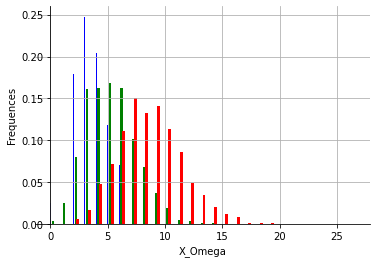

In [ ]:
# diagrammes
diagramme_batons(X1_Omega, freq_de1_tab, 'blue')
diagramme_batons(X2_Omega , freq_de2_tab, 'green')
diagramme_batons(X_Somme_Omega , freq_somme_tab, 'red')


Quelles propriétés historiquement très importantes va-t-on illustrer dans le diagramme suivant ?



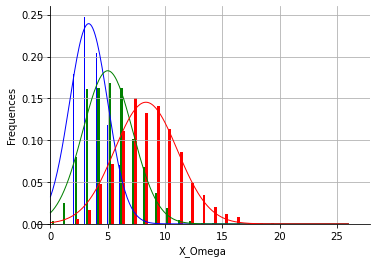

In [ ]:
def densite_normale(x,mu,sigma2) :
    y = [1/sqrt(sigma2*2*pi) * exp(-1/2*(x[k]-mu)**2/sigma2) for k in range(len(x))]
    return y

x = [k*0.1 for k in range(261)]
mu1 = 20/6
sigma2_1 = 100/36
y1 = densite_normale(x,mu1,sigma2_1)

mu2 = 100/20
sigma2_2 = 1900/400
y2 = densite_normale(x,mu2,sigma2_2)

muS = mu1+mu2
sigma2_S = sigma2_1 + sigma2_2
yS = densite_normale(x,muS,sigma2_S)


diagramme_batons(X1_Omega, freq_de1_tab, 'blue')
diagramme_batons(X2_Omega , freq_de2_tab, 'green')
diagramme_batons(X_Somme_Omega , freq_somme_tab, 'red')

plt.plot(x,y1,"b", linewidth=1)
plt.plot(x,y2,"g", linewidth=1)
plt.plot(x,yS,"r", linewidth=1)